In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from svmscratch import SVM

In [7]:
from sklearn.datasets import make_blobs

In [14]:
X, y = make_blobs(n_samples=100, centers=2, random_state=10)
y = np.where(y == 0, -1, 1)

In [12]:
def plot_hyperplane(w, b, X):
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    x_vals = np.linspace(xlim[0], xlim[1], 200)
    y_vals = lambda x, offset: -(w[0] * x + b + offset) / w[1]

    plt.plot(x_vals, y_vals(x_vals, 0), 'k-', label='Decision boundary (w.x + b = 0)')
    plt.plot(x_vals, y_vals(x_vals, 1), 'r--', label='Margin +1')
    plt.plot(x_vals, y_vals(x_vals, -1), 'b--', label='Margin -1')

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Training Accuracy: 100.00%


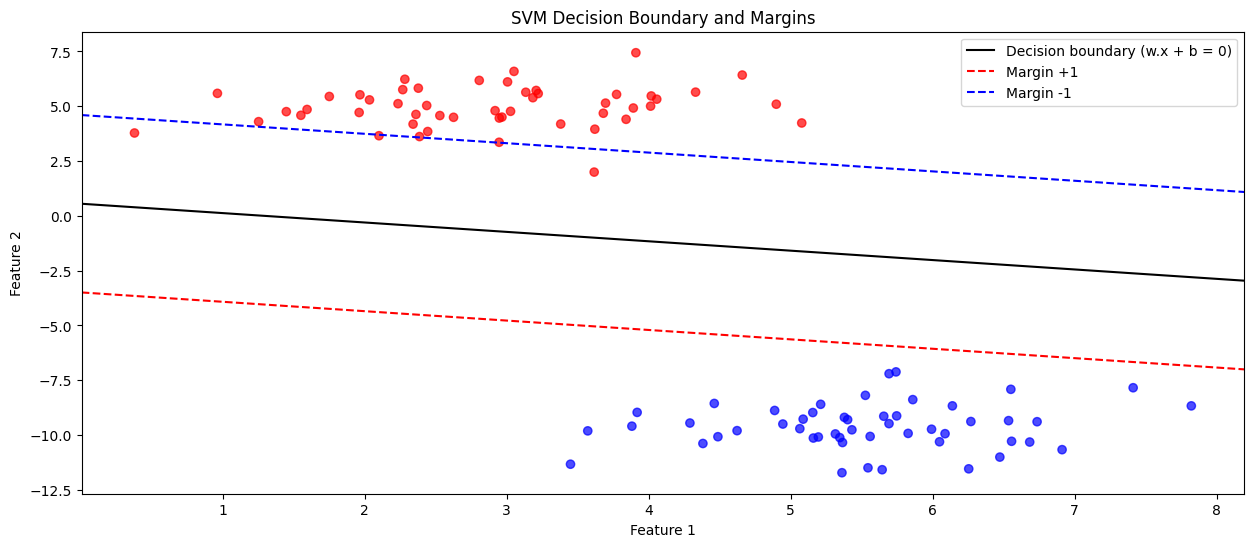

In [16]:
svm = SVM()
svm.fit(X, y)
preds = svm.predict(X)

accuracy = np.mean(preds == y)
print(f"Training Accuracy: {accuracy * 100:.2f}%")

plt.figure(figsize=(15,6))
plt.scatter(X[:, 0], X[:, 1], c=preds, cmap='bwr', alpha=0.7)
plot_hyperplane(svm.w, svm.b, X)
plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("SVM Decision Boundary and Margins")
plt.show()